### Today Concept
* Multi Linear Regression

**Multi Linear Regression**
    applying linear regression with multiple features we call it as multi linear regression

**Applying Linear Regression for boston house price dataset for prediction of house prices**

**1. Get the data**

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
import pandas as pd

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)
C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)


In [15]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df.shape

(506, 14)

**2. Pre-processing**

is there any missing values?

In [17]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

i am randomly taking **RM** column as feature and check the performance of model

In [18]:
X = df[['RM']]
y = df['target']

In [19]:
import matplotlib.pyplot as plt

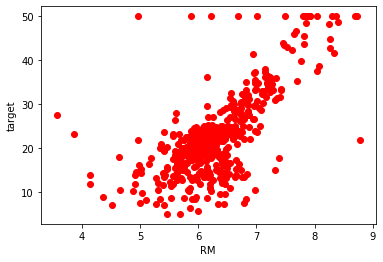

In [20]:
plt.figure()

plt.scatter(df['RM'],df['target'],c='red')
plt.xlabel('RM')
plt.ylabel('target')

plt.show()

**3. Train the model**

split the data for training data and testing


here i am considering 70% data for training 30% for testing

for training 70% how many rows we need seperate from 506 rows

In [21]:
(70*506/100)

354.2

for testing 506-354

In [22]:
506-354

152

In [23]:
from sklearn.model_selection import train_test_split

syntax
```
X_train,X_test,y_train,y_test = train_test_split(
                                features,target,train_size=0.7) 


```

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [25]:
X_train.shape

(354, 1)

In [26]:
X_test.shape

(152, 1)

In [27]:
from sklearn.linear_model import LinearRegression

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [29]:
# create object for algorithm
model = LinearRegression()

In [30]:
# train the model with training data
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [31]:
model.score(X_train,y_train)*100

51.994978720702356

**testing score**

In [32]:
model.score(X_test,y_test)*100

36.14377370505475

**Improve the model**

1. by giving more data(more example) for training
2. by taking different features
3. by combining different features
4. by parameter tunining

**we need to identify best features which effects the target**

df.corr() it gives the co-relation between columns


if the corr() value near to 1 then columns are +ve linearity
    * temperature increasing sales of icecream increasing


if the corr() value near -1 then columns are -ve linearity
        * GDP decreasing and Unemploibility increasing

if the corr() value 0 there is no relation

In [33]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


```
LSTAT ---> -0.737663
PTRATIO --> -0.507787
RM --> 0.69
ZN ---> 0.36
```

now we can take LSTAT as a feature and verify the score

In [38]:
X = df[['LSTAT']]
y = df['target']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score?**

In [43]:
model.score(X_train,y_train)*100

53.59723261111318

**testing score?**

In [44]:
model.score(X_test,y_test)*100

56.32601525732799

```
    RM      LSTAT
Train   51.99  53.59
Test    36.14  56.32

```

Now we apply multi linear regression with multiple features


RM,LSTAT

In [45]:
X = df[['RM','LSTAT']]
y = df['target']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [50]:
model.score(X_train,y_train)*100

66.32296272291099

**testing score**

In [51]:
model.score(X_test,y_test)*100

58.4592029527182

Now LSTAT,RM,ZN,PTRATIO as features

In [52]:
X = df[['LSTAT','RM','ZN','PTRATIO']]
y = df['target']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [57]:
model.score(X_train,y_train)*100

70.7246720830737

**testing score**

In [58]:
model.score(X_test,y_test)*100

61.96880374693854

### Polynomial Features to the Linear Regression

first we observe the score of model without polynomial features and compare with the polynomial features

**prediction of salary of employee with his experience**

**1. Get the data**

In [59]:
import pandas as pd

In [60]:
experience = [0,1,2,3,4,5,6,7,8]
salary = [5000,6000,7000,8000,15000,25000,40000,55000,70000]

In [61]:
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,70000


In [62]:
df.shape

(9, 2)

**2. Pre-processing**

In [63]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [64]:
X = df[['experience']]
y = df['salary']

In [65]:
import matplotlib.pyplot as plt

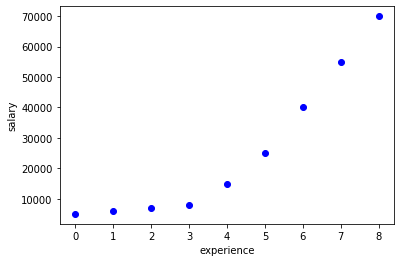

In [67]:
plt.figure()

plt.scatter(df['experience'],df['salary'],c='blue')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

**Train model**

split the data for training and testing

In [68]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [69]:
X_train

,experience
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [70]:
X_test

,experience
7,7
8,8


In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [72]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [73]:
model.score(X_train,y_train)*100

79.9249859786876

**testing score**

In [74]:
model.score(X_test,y_test)*100

-888.7811791383228

**to draw predicted line plot**

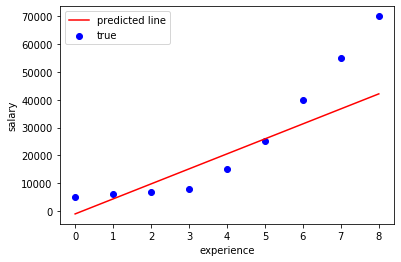

In [76]:
plt.figure()

plt.scatter(df['experience'],df['salary'],c='blue',label='true')

plt.plot(df['experience'],model.predict(X),c='red',label='predicted line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()

**Apply polynomial features to linear regression**

#### underfit
    model not able to recognise the pattern in training
    (student not able to learn the pattern when training)
#### overfit
    mode capture all the points from training but not able recognize the pattern
       (student biharting as it is)
       
#### best fit
    it should generalise the pattern. work well in training and testing


Now we can apply polynomial features and see the results

In [78]:
# import polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [80]:
# create the object by providing the higher order degree
poly = PolynomialFeatures(degree=2)

we can transform the features into higher order degree

syntax
```
X_poly_train = poly.fit_transform(train_features)
X_poly_test = poly.transform(test_featues)
```

In [81]:
X_poly_train = poly.fit_transform(X_train)

In [83]:
X_poly_test = poly.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

syntax
```
model.fit(X_poly_train,y_train)
```

In [86]:
model.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [87]:
model.score(X_poly_train,y_train)*100

98.77079828005235

**testing score**

In [88]:
model.score(X_poly_test,y_test)*100

86.7573696145123

````
        without_poly       with_poly
    
train    79.92              98.77

test    -888.78             86.75

```

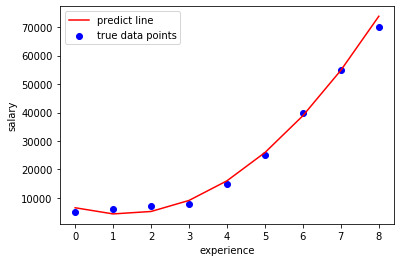

In [91]:
plt.figure()

plt.scatter(df['experience'],df['salary'],c='blue',label='true data points')
plt.plot(df['experience'],
         model.predict(poly.transform(df[['experience']])),c='red',label='predict line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()

**practice**

without using polynomial features and with using polynomial features

https://github.com/AP-State-Skill-Development-Corporation/Datasets/blob/master/Regression/Salary_Data.csv

In [ ]:
dat